In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, HashingVectorizer, TfidfTransformer
from sklearn.preprocessing import LabelEncoder
import imblearn.over_sampling as os
from imblearn.over_sampling import RandomOverSampler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

from wordcloud import WordCloud ,STOPWORDS
import re
from PIL import Image
import string
import nltk
from nltk.corpus import stopwords

from nltk import pos_tag
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.tokenize import word_tokenize

In [3]:
from sklearn import model_selection,preprocessing,linear_model,naive_bayes,metrics,svm,decomposition,ensemble
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.decomposition import NMF, TruncatedSVD
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

import textblob

from textblob import TextBlob
from nltk.stem import PorterStemmer

In [4]:
data=pd.read_excel("Womens Clothing Reviews Data.xlsx")
data.head()

,Product ID,Category,Subcategory1,SubCategory2,Location,Channel,Customer Age,Review Title,Review Text,Rating,Recommend Flag
0,767,Initmates,Intimate,Intimates,Mumbai,Mobile,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1
1,1080,General,Dresses,Dresses,Bangalore,Mobile,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1
2,1077,General,Dresses,Dresses,Gurgaon,Mobile,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0
3,1049,General Petite,Bottoms,Pants,Chennai,Web,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1
4,847,General,Tops,Blouses,Bangalore,Web,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Product ID      23486 non-null  int64 
 1   Category        23472 non-null  object
 2   Subcategory1    23472 non-null  object
 3   SubCategory2    23472 non-null  object
 4   Location        23486 non-null  object
 5   Channel         23486 non-null  object
 6   Customer Age    23486 non-null  int64 
 7   Review Title    19676 non-null  object
 8   Review Text     22641 non-null  object
 9   Rating          23486 non-null  int64 
 10  Recommend Flag  23486 non-null  int64 
dtypes: int64(4), object(7)
memory usage: 2.0+ MB


In [6]:
data.columns

Index(['Product ID', 'Category', 'Subcategory1', 'SubCategory2', 'Location',
       'Channel', 'Customer Age', 'Review Title', 'Review Text', 'Rating',
       'Recommend Flag'],
      dtype='object')

In [7]:
data.rename(columns={'Product ID':'Product_ID','Customer Age':'Customer_Age','Review Title':'Review_Title',
                    'Review Text':'Review_Text','Recommend Flag':'Recommend_Flag'},inplace=True)

In [8]:
data.columns

Index(['Product_ID', 'Category', 'Subcategory1', 'SubCategory2', 'Location',
       'Channel', 'Customer_Age', 'Review_Title', 'Review_Text', 'Rating',
       'Recommend_Flag'],
      dtype='object')

In [9]:
df=data.loc[data['Review_Text'].notna(),:]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22641 entries, 0 to 23485
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Product_ID      22641 non-null  int64 
 1   Category        22628 non-null  object
 2   Subcategory1    22628 non-null  object
 3   SubCategory2    22628 non-null  object
 4   Location        22641 non-null  object
 5   Channel         22641 non-null  object
 6   Customer_Age    22641 non-null  int64 
 7   Review_Title    19675 non-null  object
 8   Review_Text     22641 non-null  object
 9   Rating          22641 non-null  int64 
 10  Recommend_Flag  22641 non-null  int64 
dtypes: int64(4), object(7)
memory usage: 2.1+ MB


a=df.dropna(axis='rows')
a.info()

In [10]:
df.head()

,Product_ID,Category,Subcategory1,SubCategory2,Location,Channel,Customer_Age,Review_Title,Review_Text,Rating,Recommend_Flag
0,767,Initmates,Intimate,Intimates,Mumbai,Mobile,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1
1,1080,General,Dresses,Dresses,Bangalore,Mobile,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1
2,1077,General,Dresses,Dresses,Gurgaon,Mobile,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0
3,1049,General Petite,Bottoms,Pants,Chennai,Web,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1
4,847,General,Tops,Blouses,Bangalore,Web,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1


df1=df.loc[:,['Review_Text','Rating','Recommend_Flag']]
df1.head()

# Data Manipulation for NLP

In [11]:
stop=set(stopwords.words('english'))

In [12]:
stop1=list(stop)+['fit','dress','top','ordered','flattering','tight','jacket','thing','blue','also','fabric','color','still','lbs','tired']

In [13]:
stop2=list(stop)+['look','like','would','shirt','love','much','one','however','beautiful','fit','dress','top','ordered',]

In [14]:
def process_text(x):
    x = x.lower()
    x = x.strip()
    x = re.sub(r' +', ' ', x)
    x= x.replace('\n',' ')
    x = re.sub(r"[-()\"#/@;:{}`+=~|.!?,'0-9]", "", x)
    x = (' ').join([i for i in x.split(' ') if len(i)>2])
#     x = x.apply(lambda x: TextBlob(x).correct())
#     x = x.apply(lambda x: ' '.join(PorterStemmer().stem(word) for word in x.split()))
    
    return(x)

In [15]:
df['Clean_Review']=df.Review_Text.apply(process_text)

C:\Users\VVLG\AppData\Local\Temp/ipykernel_26820/2728410865.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Clean_Review']=df.Review_Text.apply(process_text)


In [16]:
df['Sentiment_Score']=df['Review_Text'].apply(lambda x: TextBlob(x).sentiment.polarity)

C:\Users\VVLG\AppData\Local\Temp/ipykernel_26820/1695630970.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Sentiment_Score']=df['Review_Text'].apply(lambda x: TextBlob(x).sentiment.polarity)


In [17]:
df['Sentiment']=np.where(df.Sentiment_Score>=0.1,'Positive',np.where(df.Sentiment_Score<=-0.1,'Negative','Neutral'))

C:\Users\VVLG\AppData\Local\Temp/ipykernel_26820/826405642.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Sentiment']=np.where(df.Sentiment_Score>=0.1,'Positive',np.where(df.Sentiment_Score<=-0.1,'Negative','Neutral'))


In [18]:
le=LabelEncoder()

In [19]:
df['Sentiment_Labled']=le.fit_transform(df.Sentiment)

C:\Users\VVLG\AppData\Local\Temp/ipykernel_26820/2481336919.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Sentiment_Labled']=le.fit_transform(df.Sentiment)


In [20]:
df.Sentiment_Labled.value_counts()

2    18696
1     3506
0      439
Name: Sentiment_Labled, dtype: int64

In [21]:
df

,Product_ID,Category,Subcategory1,SubCategory2,Location,Channel,Customer_Age,Review_Title,Review_Text,Rating,Recommend_Flag,Clean_Review,Sentiment_Score,Sentiment,Sentiment_Labled
0,767,Initmates,Intimate,Intimates,Mumbai,Mobile,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,absolutely wonderful silky and sexy and comfor...,0.633333,Positive,2
1,1080,General,Dresses,Dresses,Bangalore,Mobile,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,love this dress its sooo pretty happened find ...,0.339583,Positive,2
2,1077,General,Dresses,Dresses,Gurgaon,Mobile,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,had such high hopes for this dress and really ...,0.073675,Neutral,1
3,1049,General Petite,Bottoms,Pants,Chennai,Web,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,love love love this jumpsuit its fun flirty an...,0.550000,Positive,2
4,847,General,Tops,Blouses,Bangalore,Web,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,this shirt very flattering all due the adjusta...,0.512891,Positive,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23481,1104,General Petite,Dresses,Dresses,Gurgaon,Mobile,34,Great dress for many occasions,I was very happy to snag this dress at such a ...,5,1,was very happy snag this dress such great pric...,0.552667,Positive,2
23482,862,General Petite,Tops,Knits,Gurgaon,Web,48,Wish it was made of cotton,"It reminds me of maternity clothes. soft, stre...",3,1,reminds maternity clothes soft stretchy shiny ...,0.091667,Neutral,1
23483,1104,General Petite,Dresses,Dresses,Gurgaon,Web,31,"Cute, but see through","This fit well, but the top was very see throug...",3,0,this fit well but the top was very see through...,0.414286,Positive,2
23484,1084,General,Dresses,Dresses,Gurgaon,Web,28,"Very cute dress, perfect for summer parties an...",I bought this dress for a wedding i have this ...,3,1,bought this dress for wedding have this summer...,0.322222,Positive,2


# Word Cloud

In [22]:
Positvie_Review=df.Clean_Review[df.Rating>=4]
Negative_Review=df.Clean_Review[df.Rating<=2]

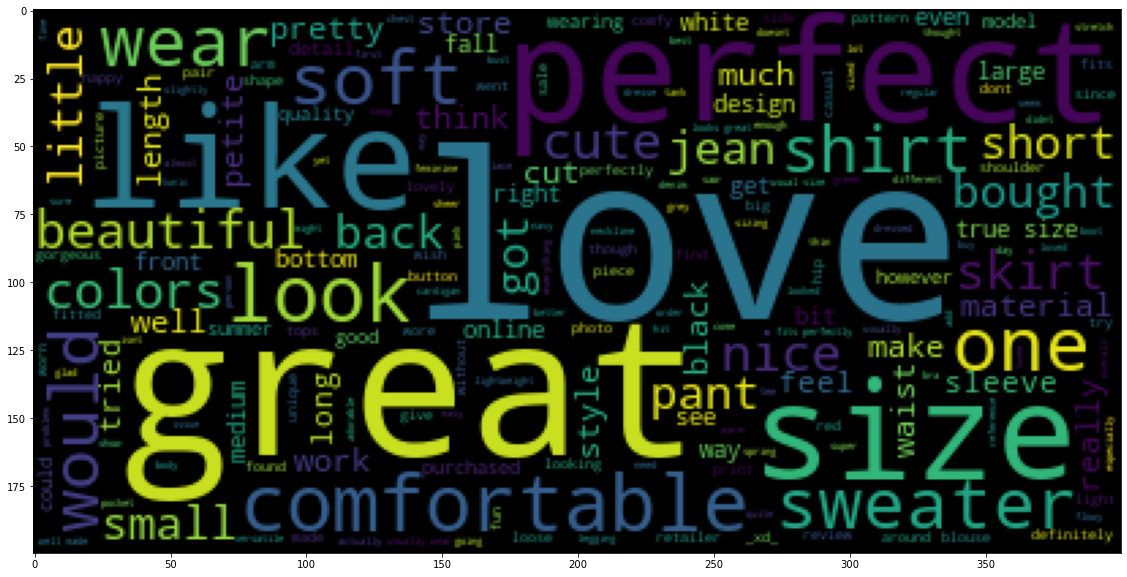

In [23]:
wordcloud = WordCloud(stopwords=stop1).generate(''.join(Positvie_Review.to_list()))

plt.figure(figsize=(20,10))
plt.imshow(wordcloud)

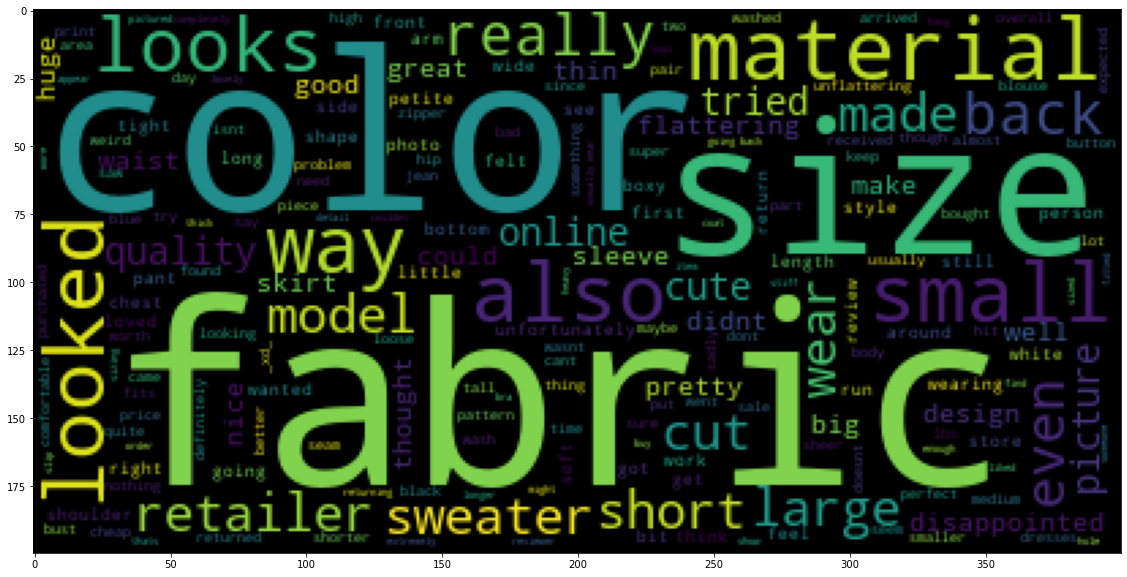

In [24]:
wordcloud = WordCloud(stopwords=stop2).generate(''.join(Negative_Review.to_list()))

plt.figure(figsize=(20,10))
plt.imshow(wordcloud)

# Re-Sampling

In [53]:
X=df[['Clean_Review','Rating']]
Y=df.Sentiment_Labled

In [54]:
# oversampling
ros=RandomOverSampler(random_state=123)
X, Y=ros.fit_resample(X,Y)

In [55]:
X.drop(columns=['Rating'],inplace=True)

In [56]:
X=pd.Series(X.Clean_Review)

In [57]:
type(X)

pandas.core.series.Series

In [58]:
X.shape

(56088,)

In [59]:
Y=Y.sample(frac=0.2)
X=X.loc[Y.index]

In [60]:
X.shape

(11218,)

# TFIDF Vectorizer

In [57]:
tfidf_vectorizer = TfidfVectorizer(ngram_range=(1, 1),  
                                   stop_words='english',
                                   token_pattern="\\b[a-z][a-z]+\\b",
                                   lowercase=True,
                                   max_df = 0.6)
tfidf_data = tfidf_vectorizer.fit_transform(X)
tfidf_data = pd.DataFrame(tfidf_data.toarray(),columns=tfidf_vectorizer.get_feature_names())

# Count Vectorizer

In [58]:
count_vectorizer = CountVectorizer(ngram_range=(1, 1),  
                                   stop_words='english',
                                   token_pattern="\\b[a-z][a-z]+\\b",
                                   lowercase=True,
                                   max_df = 0.6)
cv_data = count_vectorizer.fit_transform(X)
cv_data = pd.DataFrame(cv_data.toarray(),columns=count_vectorizer.get_feature_names())

# Train Test Split

In [59]:
tfdif_train_X, tfdif_test_X, tfdif_train_Y, tfdif_test_Y = train_test_split(tfidf_data,Y,test_size=0.2,random_state=123)
cv_data_train_X, cv_data_test_X, cv_data_train_Y, cv_data_test_Y = train_test_split(cv_data,Y,test_size=0.2,random_state=123)

In [60]:
len(tfidf_vectorizer.get_feature_names())

9252

In [61]:
tfdif_train_X.shape[1]

9252

# Model Building

## Random Forest

### RF TFIDF Vectorizer

In [62]:
RF=RandomForestClassifier(n_estimators=100,n_jobs=-1)

In [63]:
RF.fit(tfdif_train_X,tfdif_train_Y)

RandomForestClassifier(n_jobs=-1)

In [64]:
RF.score(tfdif_test_X,tfdif_test_Y)

0.8943850267379679

In [65]:
RF.predict(tfdif_test_X)

array([1, 0, 2, ..., 2, 0, 1])

In [66]:
tfdif_test_Y.values

array([1, 0, 2, ..., 2, 0, 1])

In [67]:
print(confusion_matrix(tfdif_test_Y.values, RF.predict(tfdif_test_X)))
print('\n')
print(classification_report(tfdif_test_Y.values, RF.predict(tfdif_test_X)))

[[746   0   0]
 [  4 647 128]
 [  2 103 614]]


              precision    recall  f1-score   support

           0       0.99      1.00      1.00       746
           1       0.86      0.83      0.85       779
           2       0.83      0.85      0.84       719

    accuracy                           0.89      2244
   macro avg       0.89      0.89      0.89      2244
weighted avg       0.89      0.89      0.89      2244



### RF Count Vectorizer

In [68]:
RF.fit(cv_data_train_X,cv_data_train_Y)

RandomForestClassifier(n_jobs=-1)

In [69]:
RF.score(cv_data_test_X,cv_data_test_Y)

0.8979500891265597

In [70]:
print(confusion_matrix(cv_data_test_Y.values, RF.predict(cv_data_test_X)))
print('\n')
print(classification_report(cv_data_test_Y.values, RF.predict(cv_data_test_X)))

[[746   0   0]
 [  9 627 143]
 [  3  74 642]]


              precision    recall  f1-score   support

           0       0.98      1.00      0.99       746
           1       0.89      0.80      0.85       779
           2       0.82      0.89      0.85       719

    accuracy                           0.90      2244
   macro avg       0.90      0.90      0.90      2244
weighted avg       0.90      0.90      0.90      2244



## Naive Bayes

### NB TFIDF Vectorizer

In [71]:
nb=MultinomialNB()

In [72]:
nb.fit(tfdif_train_X,tfdif_train_Y)

MultinomialNB()

In [73]:
y_pred = nb.predict(tfdif_test_X)
y_pred

array([1, 0, 2, ..., 1, 1, 1])

In [74]:
tfdif_test_Y.values

array([1, 0, 2, ..., 2, 0, 1])

In [75]:
print(confusion_matrix(tfdif_test_Y.values, y_pred))
print('\n')
print(classification_report(tfdif_test_Y, y_pred))

[[688  46  12]
 [ 58 604 117]
 [ 19 180 520]]


              precision    recall  f1-score   support

           0       0.90      0.92      0.91       746
           1       0.73      0.78      0.75       779
           2       0.80      0.72      0.76       719

    accuracy                           0.81      2244
   macro avg       0.81      0.81      0.81      2244
weighted avg       0.81      0.81      0.81      2244



### NB Count Vectorizer

In [76]:
nb.fit(cv_data_train_X,cv_data_train_Y)

MultinomialNB()

In [77]:
y_pred = nb.predict(cv_data_test_X)
y_pred

array([1, 0, 2, ..., 2, 1, 1])

In [78]:
cv_data_test_Y.values

array([1, 0, 2, ..., 2, 0, 1])

In [79]:
print(confusion_matrix(cv_data_test_Y.values, y_pred))
print('\n')
print(classification_report(cv_data_test_Y.values, y_pred))

[[665  66  15]
 [ 46 604 129]
 [ 19 142 558]]


              precision    recall  f1-score   support

           0       0.91      0.89      0.90       746
           1       0.74      0.78      0.76       779
           2       0.79      0.78      0.79       719

    accuracy                           0.81      2244
   macro avg       0.82      0.81      0.82      2244
weighted avg       0.82      0.81      0.81      2244



# Understanding sentiment among various variables

In [81]:
df.head()

,Product_ID,Category,Subcategory1,SubCategory2,Location,Channel,Customer_Age,Review_Title,Review_Text,Rating,Recommend_Flag,Clean_Review,Sentiment_Score,Sentiment,Sentiment_Labled
0,767,Initmates,Intimate,Intimates,Mumbai,Mobile,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,absolutely wonderful silky and sexy and comfor...,0.633333,Positive,2
1,1080,General,Dresses,Dresses,Bangalore,Mobile,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,love this dress its sooo pretty happened find ...,0.339583,Positive,2
2,1077,General,Dresses,Dresses,Gurgaon,Mobile,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,had such high hopes for this dress and really ...,0.073675,Neutral,1
3,1049,General Petite,Bottoms,Pants,Chennai,Web,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,love love love this jumpsuit its fun flirty an...,0.550000,Positive,2
4,847,General,Tops,Blouses,Bangalore,Web,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,this shirt very flattering all due the adjusta...,0.512891,Positive,2


In [98]:
df.columns

Index(['Product_ID', 'Category', 'Subcategory1', 'SubCategory2', 'Location',
       'Channel', 'Customer_Age', 'Review_Title', 'Review_Text', 'Rating',
       'Recommend_Flag', 'Clean_Review', 'Sentiment_Score', 'Sentiment',
       'Sentiment_Labled'],
      dtype='object')

In [118]:
df1=df[['Category', 'Subcategory1', 'SubCategory2', 'Location','Customer_Age','Sentiment_Score']]

In [119]:
df1.head()

,Category,Subcategory1,SubCategory2,Location,Customer_Age,Sentiment_Score
0,Initmates,Intimate,Intimates,Mumbai,33,0.633333
1,General,Dresses,Dresses,Bangalore,34,0.339583
2,General,Dresses,Dresses,Gurgaon,60,0.073675
3,General Petite,Bottoms,Pants,Chennai,50,0.550000
4,General,Tops,Blouses,Bangalore,47,0.512891


In [120]:
df1.dropna(axis='rows',inplace=True)

C:\Users\VVLG\anaconda3\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [148]:
df1_sub_cat1_senti=df1.groupby('Subcategory1')['Sentiment_Score'].describe().sort_values(['count','mean'],ascending=False)
df1_sub_cat1_senti

,count,mean,std,min,25%,50%,75%,max
Subcategory1,,,,,,,,
Tops,10048.0,0.250315,0.172388,-0.975000,0.143700,0.242857,0.348165,1.000000
Dresses,6145.0,0.249919,0.179263,-0.916667,0.140000,0.237103,0.350000,1.000000
Bottoms,3662.0,0.250308,0.175672,-0.533333,0.140248,0.239052,0.353229,1.000000
Intimate,1653.0,0.254538,0.189941,-0.575000,0.130952,0.241667,0.361667,1.000000
Jackets,1002.0,0.238686,0.186180,-0.750000,0.123067,0.225000,0.341435,1.000000
Trend,118.0,0.201617,0.177501,-0.270833,0.097848,0.199426,0.310983,0.666667


<b><font color='Green'>The most purchased item is Tops and its sentiment the highest, the least is Trend and even though its least, its sentiment is very positive

In [149]:
df1_sub_cat2_senti=df1.groupby('SubCategory2')['Sentiment_Score'].describe().sort_values(['count','mean'],ascending=False)
df1_sub_cat2_senti

,count,mean,std,min,25%,50%,75%,max
SubCategory2,,,,,,,,
Dresses,6145.0,0.249919,0.179263,-0.916667,0.140000,0.237103,0.350000,1.000000
Knits,4626.0,0.250936,0.174234,-0.975000,0.143519,0.243838,0.350000,1.000000
Blouses,2983.0,0.253230,0.166562,-0.396429,0.150000,0.245072,0.345000,1.000000
Sweaters,1380.0,0.244853,0.178350,-0.700000,0.138393,0.233542,0.340301,1.000000
Pants,1350.0,0.244747,0.181919,-0.447917,0.132178,0.235316,0.350000,1.000000
Jeans,1104.0,0.251557,0.169816,-0.533333,0.144226,0.241667,0.357440,1.000000
Fine gauge,1059.0,0.246506,0.172530,-0.319792,0.134558,0.242857,0.343056,1.000000
Skirts,903.0,0.257844,0.177169,-0.266667,0.148616,0.237742,0.353299,1.000000
Jackets,683.0,0.244589,0.192019,-0.750000,0.126812,0.230500,0.350000,1.000000


<b><font color='Green'>Dresses are bought more and carry high sentiment value, while Casual Bottoms are bought the least and have very less sentiment value.

In [150]:
df1_location_senti=df1.groupby('Location')['Sentiment_Score'].describe().sort_values(['count','mean'],ascending=False)
df1_location_senti

,count,mean,std,min,25%,50%,75%,max
Location,,,,,,,,
Gurgaon,8486.0,0.253268,0.180183,-0.975000,0.140772,0.242593,0.356532,1.0
Mumbai,6856.0,0.249931,0.174490,-0.975000,0.141829,0.240000,0.348746,1.0
Bangalore,5048.0,0.245881,0.173798,-0.575000,0.137500,0.236418,0.345833,1.0
Chennai,2238.0,0.244537,0.177579,-0.916667,0.134058,0.232864,0.350000,1.0


<b><font color='Green'>People from Gurgaon buy more and their sentiment are equally high, while even though less people are from Chennai they do have high sentiments.

In [151]:
df1_age_senti=df1.groupby('Customer_Age')['Sentiment_Score'].describe().sort_values(['count','mean'],ascending=False)
df1_age_senti

,count,mean,std,min,25%,50%,75%,max
Customer_Age,,,,,,,,
39,1225.0,0.227382,0.169668,-0.916667,0.127513,0.220000,0.318506,0.925000
35,851.0,0.248167,0.176667,-0.262500,0.129299,0.239100,0.346429,0.933333
36,799.0,0.265312,0.172065,-0.178571,0.149167,0.252381,0.367089,1.000000
34,765.0,0.254961,0.173648,-0.562500,0.154167,0.241667,0.350000,1.000000
38,751.0,0.245227,0.181151,-0.375000,0.137702,0.234722,0.350312,1.000000
...,...,...,...,...,...,...,...,...
90,2.0,0.444066,0.326590,0.213131,0.328598,0.444066,0.559533,0.675000
99,2.0,0.425514,0.011058,0.417695,0.421604,0.425514,0.429424,0.433333
93,2.0,0.388492,0.059487,0.346429,0.367460,0.388492,0.409524,0.430556


<b><font color='Green'>The highest bought age are people at 39 and have high sentiments, whereas older people tend to buy less and have less sentiment.

# Recommending Products

In [11]:
df.head()

,Product_ID,Category,Subcategory1,SubCategory2,Location,Channel,Customer_Age,Review_Title,Review_Text,Rating,Recommend_Flag
0,767,Initmates,Intimate,Intimates,Mumbai,Mobile,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1
1,1080,General,Dresses,Dresses,Bangalore,Mobile,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1
2,1077,General,Dresses,Dresses,Gurgaon,Mobile,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0
3,1049,General Petite,Bottoms,Pants,Chennai,Web,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1
4,847,General,Tops,Blouses,Bangalore,Web,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1


In [12]:
df2=df[['Subcategory1','Rating','Location','Channel']]

In [13]:
df2.dropna(axis='rows',inplace=True)

C:\Users\VVLG\anaconda3\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [14]:
df2.Location.unique()

array(['Mumbai', 'Bangalore', 'Gurgaon', 'Chennai'], dtype=object)

<b><center>Finding Recommendation based on Location.

In [15]:
def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1

In [16]:
RS_Mumbai=(df2[df2['Location'] =="Mumbai"]
          .groupby(['Channel','Subcategory1'])['Rating']
          .sum().unstack().reset_index().fillna(0)
          .set_index('Channel')
          )
RS_Mumbai

Subcategory1,Bottoms,Dresses,Intimate,Jackets,Tops,Trend
Channel,,,,,,
Mobile,1990,3218,929,492,5336,31
Web,2950,4512,1272,757,7203,59


In [17]:
RS_Mumbai = RS_Mumbai.applymap(encode_units)
frequent_items = apriori(RS_Mumbai, min_support=0.6, use_colnames=True)
frequent_items.sort_values(by='support', ascending=False)

,support,itemsets
0,1.0,(Bottoms)
47,1.0,"(Intimate, Tops, Bottoms, Jackets)"
34,1.0,"(Tops, Jackets, Dresses)"
35,1.0,"(Trend, Jackets, Dresses)"
36,1.0,"(Trend, Tops, Dresses)"
...,...,...
26,1.0,"(Intimate, Tops, Bottoms)"
27,1.0,"(Intimate, Trend, Bottoms)"
28,1.0,"(Tops, Bottoms, Jackets)"
29,1.0,"(Trend, Bottoms, Jackets)"


In [18]:
rules1 = association_rules(frequent_items, metric="confidence", min_threshold=1)
rules1

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Bottoms),(Dresses),1.0,1.0,1.0,1.0,1.0,0.0,inf
1,(Dresses),(Bottoms),1.0,1.0,1.0,1.0,1.0,0.0,inf
2,(Intimate),(Bottoms),1.0,1.0,1.0,1.0,1.0,0.0,inf
3,(Bottoms),(Intimate),1.0,1.0,1.0,1.0,1.0,0.0,inf
4,(Bottoms),(Jackets),1.0,1.0,1.0,1.0,1.0,0.0,inf
...,...,...,...,...,...,...,...,...,...
597,(Dresses),"(Tops, Intimate, Trend, Bottoms, Jackets)",1.0,1.0,1.0,1.0,1.0,0.0,inf
598,(Intimate),"(Tops, Dresses, Trend, Bottoms, Jackets)",1.0,1.0,1.0,1.0,1.0,0.0,inf
599,(Trend),"(Tops, Dresses, Intimate, Bottoms, Jackets)",1.0,1.0,1.0,1.0,1.0,0.0,inf
600,(Bottoms),"(Tops, Dresses, Intimate, Trend, Jackets)",1.0,1.0,1.0,1.0,1.0,0.0,inf


<b><font color='Green'><center>The best recommendation is all. When any customer is purchasing anything from Mumbai in any channel, any recommendation will lead to success.

In [19]:
RS_Bangalore=(df2[df2['Location'] =="Bangalore"]
          .groupby(['Channel','Subcategory1'])['Rating']
          .sum().unstack().reset_index().fillna(0)
          .set_index('Channel')
          )
RS_Bangalore

Subcategory1,Bottoms,Dresses,Intimate,Jackets,Tops,Trend
Channel,,,,,,
Mobile,1423,2226,710,446,4084,57
Web,2117,3288,809,475,5392,66


In [20]:
RS_Bangalore = RS_Bangalore.applymap(encode_units)
frequent_items = apriori(RS_Bangalore, min_support=0.5, use_colnames=True)
frequent_items.sort_values(by='support', ascending=False)

,support,itemsets
0,1.0,(Bottoms)
47,1.0,"(Intimate, Tops, Bottoms, Jackets)"
34,1.0,"(Tops, Jackets, Dresses)"
35,1.0,"(Trend, Jackets, Dresses)"
36,1.0,"(Trend, Tops, Dresses)"
...,...,...
26,1.0,"(Intimate, Tops, Bottoms)"
27,1.0,"(Intimate, Trend, Bottoms)"
28,1.0,"(Tops, Bottoms, Jackets)"
29,1.0,"(Trend, Bottoms, Jackets)"


In [21]:
rules2 = association_rules(frequent_items, metric="confidence", min_threshold=1)
rules2

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Bottoms),(Dresses),1.0,1.0,1.0,1.0,1.0,0.0,inf
1,(Dresses),(Bottoms),1.0,1.0,1.0,1.0,1.0,0.0,inf
2,(Intimate),(Bottoms),1.0,1.0,1.0,1.0,1.0,0.0,inf
3,(Bottoms),(Intimate),1.0,1.0,1.0,1.0,1.0,0.0,inf
4,(Bottoms),(Jackets),1.0,1.0,1.0,1.0,1.0,0.0,inf
...,...,...,...,...,...,...,...,...,...
597,(Dresses),"(Tops, Intimate, Trend, Bottoms, Jackets)",1.0,1.0,1.0,1.0,1.0,0.0,inf
598,(Intimate),"(Tops, Dresses, Trend, Bottoms, Jackets)",1.0,1.0,1.0,1.0,1.0,0.0,inf
599,(Trend),"(Tops, Dresses, Intimate, Bottoms, Jackets)",1.0,1.0,1.0,1.0,1.0,0.0,inf
600,(Bottoms),"(Tops, Dresses, Intimate, Trend, Jackets)",1.0,1.0,1.0,1.0,1.0,0.0,inf


<b><font color='Green'><center>Just like Mumbai, the best recommendation is all. When any customer is purchasing anything from Bangalore through any channel, any recommendation will lead to success.

In [22]:
RS_Gurgaon=(df2[df2['Location'] =="Gurgaon"]
          .groupby(['Channel','Subcategory1'])['Rating']
          .sum().unstack().reset_index().fillna(0)
          .set_index('Channel')
          )
RS_Gurgaon

Subcategory1,Bottoms,Dresses,Intimate,Jackets,Tops,Trend
Channel,,,,,,
Mobile,2451,4137,1085,718,6511,81
Web,3214,5556,1538,950,9100,103


In [23]:
RS_Gurgaon = RS_Gurgaon.applymap(encode_units)
frequent_items = apriori(RS_Gurgaon, min_support=0.6, use_colnames=True)
frequent_items.sort_values(by='support', ascending=False)

,support,itemsets
0,1.0,(Bottoms)
47,1.0,"(Intimate, Tops, Bottoms, Jackets)"
34,1.0,"(Tops, Jackets, Dresses)"
35,1.0,"(Trend, Jackets, Dresses)"
36,1.0,"(Trend, Tops, Dresses)"
...,...,...
26,1.0,"(Intimate, Tops, Bottoms)"
27,1.0,"(Intimate, Trend, Bottoms)"
28,1.0,"(Tops, Bottoms, Jackets)"
29,1.0,"(Trend, Bottoms, Jackets)"


In [24]:
rules3 = association_rules(frequent_items, metric="confidence", min_threshold=1)
rules3

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Bottoms),(Dresses),1.0,1.0,1.0,1.0,1.0,0.0,inf
1,(Dresses),(Bottoms),1.0,1.0,1.0,1.0,1.0,0.0,inf
2,(Intimate),(Bottoms),1.0,1.0,1.0,1.0,1.0,0.0,inf
3,(Bottoms),(Intimate),1.0,1.0,1.0,1.0,1.0,0.0,inf
4,(Bottoms),(Jackets),1.0,1.0,1.0,1.0,1.0,0.0,inf
...,...,...,...,...,...,...,...,...,...
597,(Dresses),"(Tops, Intimate, Trend, Bottoms, Jackets)",1.0,1.0,1.0,1.0,1.0,0.0,inf
598,(Intimate),"(Tops, Dresses, Trend, Bottoms, Jackets)",1.0,1.0,1.0,1.0,1.0,0.0,inf
599,(Trend),"(Tops, Dresses, Intimate, Bottoms, Jackets)",1.0,1.0,1.0,1.0,1.0,0.0,inf
600,(Bottoms),"(Tops, Dresses, Intimate, Trend, Jackets)",1.0,1.0,1.0,1.0,1.0,0.0,inf


<b><font color='Green'><center>The best recommendation is all. When any customer is purchasing anything from Gurgaon through any channel, any recommendation will lead to success.

In [25]:
RS_Chennai=(df2[df2['Location'] =="Chennai"]
          .groupby(['Channel','Subcategory1'])['Rating']
          .sum().unstack().reset_index().fillna(0)
          .set_index('Channel')
          )
RS_Chennai

Subcategory1,Bottoms,Dresses,Intimate,Jackets,Tops,Trend
Channel,,,,,,
Mobile,723,1052,316,191,1817,37
Web,801,1444,401,234,2334,19


In [26]:
RS_Chennai = RS_Chennai.applymap(encode_units)
frequent_items = apriori(RS_Chennai, min_support=0.6, use_colnames=True)
frequent_items.sort_values(by='support', ascending=False)

,support,itemsets
0,1.0,(Bottoms)
47,1.0,"(Intimate, Tops, Bottoms, Jackets)"
34,1.0,"(Tops, Jackets, Dresses)"
35,1.0,"(Trend, Jackets, Dresses)"
36,1.0,"(Trend, Tops, Dresses)"
...,...,...
26,1.0,"(Intimate, Tops, Bottoms)"
27,1.0,"(Intimate, Trend, Bottoms)"
28,1.0,"(Tops, Bottoms, Jackets)"
29,1.0,"(Trend, Bottoms, Jackets)"


In [27]:
rules4 = association_rules(frequent_items, metric="confidence", min_threshold=1)
rules4

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Bottoms),(Dresses),1.0,1.0,1.0,1.0,1.0,0.0,inf
1,(Dresses),(Bottoms),1.0,1.0,1.0,1.0,1.0,0.0,inf
2,(Intimate),(Bottoms),1.0,1.0,1.0,1.0,1.0,0.0,inf
3,(Bottoms),(Intimate),1.0,1.0,1.0,1.0,1.0,0.0,inf
4,(Bottoms),(Jackets),1.0,1.0,1.0,1.0,1.0,0.0,inf
...,...,...,...,...,...,...,...,...,...
597,(Dresses),"(Tops, Intimate, Trend, Bottoms, Jackets)",1.0,1.0,1.0,1.0,1.0,0.0,inf
598,(Intimate),"(Tops, Dresses, Trend, Bottoms, Jackets)",1.0,1.0,1.0,1.0,1.0,0.0,inf
599,(Trend),"(Tops, Dresses, Intimate, Bottoms, Jackets)",1.0,1.0,1.0,1.0,1.0,0.0,inf
600,(Bottoms),"(Tops, Dresses, Intimate, Trend, Jackets)",1.0,1.0,1.0,1.0,1.0,0.0,inf


<b><font color='Green'><center>The best recommendation is all. When any customer is purchasing anything from Chennai through any channel, any recommendation will lead to success.

In [28]:
df.head()

,Product_ID,Category,Subcategory1,SubCategory2,Location,Channel,Customer_Age,Review_Title,Review_Text,Rating,Recommend_Flag
0,767,Initmates,Intimate,Intimates,Mumbai,Mobile,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1
1,1080,General,Dresses,Dresses,Bangalore,Mobile,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1
2,1077,General,Dresses,Dresses,Gurgaon,Mobile,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0
3,1049,General Petite,Bottoms,Pants,Chennai,Web,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1
4,847,General,Tops,Blouses,Bangalore,Web,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1


In [29]:
df.columns

Index(['Product_ID', 'Category', 'Subcategory1', 'SubCategory2', 'Location',
       'Channel', 'Customer_Age', 'Review_Title', 'Review_Text', 'Rating',
       'Recommend_Flag'],
      dtype='object')

In [30]:
df3=df[['Customer_Age','Rating','Subcategory1']]
df3.dropna(axis='rows',inplace=True)
df3.head()

C:\Users\VVLG\anaconda3\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


,Customer_Age,Rating,Subcategory1
0,33,4,Intimate
1,34,5,Dresses
2,60,3,Dresses
3,50,5,Bottoms
4,47,5,Tops


In [31]:
df3.Customer_Age.min()

18

In [32]:
df3['Customer_Age_New']=np.where(
(df3['Customer_Age'] > 10) & (df3['Customer_Age'] <= 20),'Teens',np.where(
    (df3.Customer_Age>20) & (df3.Customer_Age<=30),'20s',np.where(
    (df3.Customer_Age>30) & (df3.Customer_Age<=40),'30s',np.where(
    (df3.Customer_Age>40) & (df3.Customer_Age<=50),'40s',np.where(
    df3.Customer_Age>50,'Oldies',np.NaN)
    )
    )
)
)

C:\Users\VVLG\AppData\Local\Temp/ipykernel_28708/2748167453.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['Customer_Age_New']=np.where(


In [33]:
df3.Customer_Age_New.unique()

array(['30s', 'Oldies', '40s', '20s', 'Teens'], dtype=object)

In [34]:
df3.head()

,Customer_Age,Rating,Subcategory1,Customer_Age_New
0,33,4,Intimate,30s
1,34,5,Dresses,30s
2,60,3,Dresses,Oldies
3,50,5,Bottoms,40s
4,47,5,Tops,40s


In [35]:
Age_Teens_Senti=(df3[df3['Customer_Age_New'] =="Teens"]
          .groupby(['Customer_Age_New','Subcategory1'])['Rating']
          .sum().unstack().reset_index().fillna(0)
          .set_index('Customer_Age_New')
          )
Age_Teens_Senti

Subcategory1,Bottoms,Dresses,Intimate,Jackets,Tops,Trend
Customer_Age_New,,,,,,
Teens,83,171,79,34,269,6


In [36]:
Age_Teens_Senti = Age_Teens_Senti.applymap(encode_units)
frequent_items = apriori(Age_Teens_Senti, min_support=1, use_colnames=True)
frequent_items.sort_values(by='support', ascending=False)

,support,itemsets
0,1.0,(Bottoms)
47,1.0,"(Intimate, Tops, Bottoms, Jackets)"
34,1.0,"(Tops, Jackets, Dresses)"
35,1.0,"(Trend, Jackets, Dresses)"
36,1.0,"(Trend, Tops, Dresses)"
...,...,...
26,1.0,"(Intimate, Tops, Bottoms)"
27,1.0,"(Intimate, Trend, Bottoms)"
28,1.0,"(Tops, Bottoms, Jackets)"
29,1.0,"(Trend, Bottoms, Jackets)"


In [37]:
rules5 = association_rules(frequent_items, metric="confidence", min_threshold=1)
rules5

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Bottoms),(Dresses),1.0,1.0,1.0,1.0,1.0,0.0,inf
1,(Dresses),(Bottoms),1.0,1.0,1.0,1.0,1.0,0.0,inf
2,(Intimate),(Bottoms),1.0,1.0,1.0,1.0,1.0,0.0,inf
3,(Bottoms),(Intimate),1.0,1.0,1.0,1.0,1.0,0.0,inf
4,(Bottoms),(Jackets),1.0,1.0,1.0,1.0,1.0,0.0,inf
...,...,...,...,...,...,...,...,...,...
597,(Dresses),"(Tops, Intimate, Trend, Bottoms, Jackets)",1.0,1.0,1.0,1.0,1.0,0.0,inf
598,(Intimate),"(Tops, Dresses, Trend, Bottoms, Jackets)",1.0,1.0,1.0,1.0,1.0,0.0,inf
599,(Trend),"(Tops, Dresses, Intimate, Bottoms, Jackets)",1.0,1.0,1.0,1.0,1.0,0.0,inf
600,(Bottoms),"(Tops, Dresses, Intimate, Trend, Jackets)",1.0,1.0,1.0,1.0,1.0,0.0,inf


<b><font color='Green'><center>The best recommendation for any teen is all. When any teen is purchasing anything from Sub Category 1, any recommendation will lead to success.

# Topic Modeling

In [22]:
stop_words = ['love', 'dress', 'dresses']

import re
pattern = [f'(\\b{word}\\b)' for word in stop_words]
pattern = '|'.join(pattern)
# re.sub(pattern, '', text)

In [23]:
X=df.Clean_Review

In [24]:
X.replace(to_replace=pattern, value='', regex=True, inplace=True)

C:\Users\VVLG\anaconda3\lib\site-packages\pandas\core\generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [25]:
X=X.sample(frac=0.4545)

In [26]:
count_vectorizer = CountVectorizer(ngram_range=(1, 1),  
                                   stop_words='english',
                                   token_pattern="\\b[a-z][a-z]+\\b",
                                   lowercase=True,
                                   max_df = 0.6)
cv_data = count_vectorizer.fit_transform(X)
cv_data = pd.DataFrame(cv_data.toarray(),columns=count_vectorizer.get_feature_names())

tfidf_vectorizer = TfidfVectorizer(ngram_range=(1, 1),  
                                   stop_words='english',
                                   token_pattern="\\b[a-z][a-z]+\\b",
                                   lowercase=True,
                                   max_df = 0.6)
tfidf_data = tfidf_vectorizer.fit_transform(X)
tfidf_data = pd.DataFrame(tfidf_data.toarray(),columns=tfidf_vectorizer.get_feature_names())

In [96]:
def display_topics2(model, feature_names, no_top_words=10, topic_names = None):
    
    for index, topic in enumerate(model.components_):
        _words_=[]
        if not topic_names or not topic_names[index]:
            print(f"\nTopic {index}")
        else:
            print(f"\nTopic {topic_names[index]}:")
        msg = ", ".join([f'{feature_names[i]} ({topic[i]:6.4f})' 
                             for i in topic.argsort()[:-no_top_words-1:-1]])
        
        _words_.append(", ".join([f'{feature_names[i]}' 
                             for i in topic.argsort()[:-no_top_words-1:-1]]))
        print(msg)
        print(_words_)

In [29]:
# try using 50 dimensions
n_comp = 50
lsa_tfidf = TruncatedSVD(n_components=n_comp)
lsa_cv = TruncatedSVD(n_components=n_comp)
nmf_tfidf = NMF(n_components=n_comp)
nmf_cv = NMF(n_components=n_comp)

lsa_tfidf_data = lsa_tfidf.fit_transform(tfidf_data)
lsa_cv_data = lsa_cv.fit_transform(cv_data)
nmf_tfidf_data = nmf_tfidf.fit_transform(tfidf_data)
nmf_cv_data = nmf_cv.fit_transform(cv_data)

C:\Users\VVLG\anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:312: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(("The 'init' value, when 'init=None' and "
C:\Users\VVLG\anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:312: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(("The 'init' value, when 'init=None' and "


In [97]:
# topic modeling with lsa and tfidf
display_topics2(lsa_tfidf, tfidf_vectorizer.get_feature_names(),10)


Topic 0
size (0.2299), great (0.1980), fit (0.1953), wear (0.1739), like (0.1690), small (0.1553), just (0.1523), color (0.1367), fabric (0.1312), really (0.1249)
['size, great, fit, wear, like, small, just, color, fabric, really']

Topic 1
great (0.4544), comfortable (0.2550), jeans (0.2199), soft (0.1399), pants (0.1124), looks (0.1068), color (0.1023), super (0.1009), compliments (0.0937), leggings (0.0835)
['great, comfortable, jeans, soft, pants, looks, color, super, compliments, leggings']

Topic 2
size (0.4030), great (0.2267), small (0.2145), wear (0.1988), true (0.1774), perfect (0.1502), medium (0.1369), jeans (0.1179), fits (0.1133), fit (0.1115)
['size, great, small, wear, true, perfect, medium, jeans, fits, fit']

Topic 3
shirt (0.6259), cute (0.3143), large (0.1847), runs (0.1760), small (0.1757), little (0.1358), wear (0.1162), really (0.1059), super (0.1042), medium (0.0966)
['shirt, cute, large, runs, small, little, wear, really, super, medium']

Topic 4
sweater (0.61

In [31]:
# topic modeling with lsa and countvectorizer
display_topics2(lsa_cv, count_vectorizer.get_feature_names(),10)


Topic 0
size (0.3560), fit (0.2676), like (0.2599), wear (0.2297), just (0.2069), great (0.1948), small (0.1768), fabric (0.1573), color (0.1481), look (0.1416)
['size, fit, like, wear, just, great, small, fabric, color, look']

Topic 1
size (0.7836), small (0.1465), fit (0.1067), true (0.0953), ordered (0.0859), large (0.0499), usually (0.0458), usual (0.0444), runs (0.0436), medium (0.0414)
['size, small, fit, true, ordered, large, usually, usual, runs, medium']

Topic 2
like (0.6278), size (0.1131), really (0.0998), just (0.0843), look (0.0816), fabric (0.0725), looked (0.0616), didnt (0.0579), ordered (0.0513), tried (0.0509)
['like, size, really, just, look, fabric, looked, didnt, ordered, tried']

Topic 3
fit (0.6568), great (0.2170), color (0.0772), petite (0.0751), just (0.0750), length (0.0628), fabric (0.0598), waist (0.0588), flattering (0.0564), jeans (0.0518)
['fit, great, color, petite, just, length, fabric, waist, flattering, jeans']

Topic 4
fit (0.4145), small (0.3662

In [32]:
# topic modeling with nmf and tfidf
display_topics2(nmf_tfidf, tfidf_vectorizer.get_feature_names(),10)


Topic 0
like (15.0797), feel (2.4087), looked (1.8252), dont (1.5308), model (1.2759), felt (1.1206), shape (0.9295), wearing (0.8720), picture (0.8027), reviewers (0.6909)
['like, feel, looked, dont, model, felt, shape, wearing, picture, reviewers']

Topic 1
comfortable (6.7765), easy (0.4229), casual (0.3573), extremely (0.2893), stylish (0.2370), dressy (0.2264), versatile (0.2096), feel (0.1919), stretchy (0.1354), favorite (0.1282)
['comfortable, easy, casual, extremely, stylish, dressy, versatile, feel, stretchy, favorite']

Topic 2
wear (3.5480), wait (0.5359), usually (0.4734), easy (0.4175), underneath (0.3222), bra (0.2555), normally (0.2287), cami (0.2180), retailer (0.1805), dont (0.1516)
['wear, wait, usually, easy, underneath, bra, normally, cami, retailer, dont']

Topic 3
shirt (4.9828), boxy (0.1722), shirts (0.1219), tee (0.1134), returning (0.1071), underneath (0.1062), flowy (0.1054), details (0.0965), basic (0.0804), maternity (0.0785)
['shirt, boxy, shirts, tee, r

In [33]:
# topic modeling with nmf and countvectorizer
display_topics2(nmf_cv, count_vectorizer.get_feature_names(),10)


Topic 0
like (31.1992), feel (2.2008), looked (1.5297), felt (1.0857), dont (0.9241), model (0.8651), picture (0.8310), wearing (0.7325), does (0.6367), loose (0.5644)
['like, feel, looked, felt, dont, model, picture, wearing, does, loose']

Topic 1
size (7.7759), true (0.9725), usual (0.4232), smaller (0.2891), normal (0.2311), purchased (0.1975), order (0.1896), usually (0.1776), larger (0.1755), regular (0.1737)
['size, true, usual, smaller, normal, purchased, order, usually, larger, regular']

Topic 2
wear (8.9365), usually (0.7064), wait (0.4217), easy (0.3222), underneath (0.3214), bra (0.3172), normally (0.2497), want (0.2494), tank (0.2274), time (0.2081)
['wear, usually, wait, easy, underneath, bra, normally, want, tank, time']

Topic 3
fit (7.8494), perfectly (0.6359), lbs (0.2744), better (0.2641), loose (0.2592), tight (0.1740), style (0.1712), chest (0.1373), fine (0.1261), overall (0.1175)
['fit, perfectly, lbs, better, loose, tight, style, chest, fine, overall']

Topic 